Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab, następującym linkiem:

<a target="_blank" href="https://colab.research.google.com/github/OlimpiadaAI/szkolenia/blob/edycja1/03_klasteryzacja_som.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Klasteryzacja i samoorganizujące się mapy

In [1]:
PLOTTING= True

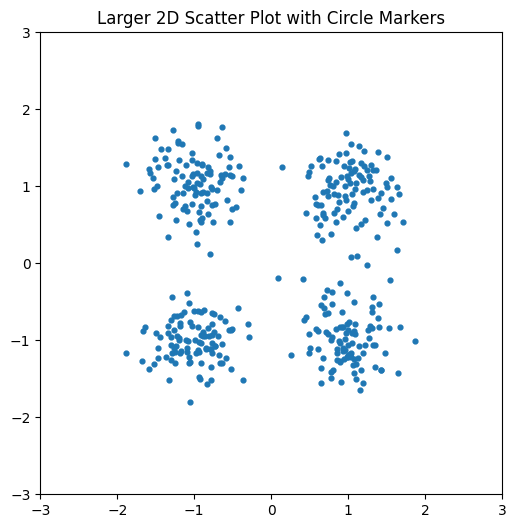

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples per cloud
num_samples = 100

# Standard deviation for the normal distribution
std_dev = 0.33

# Centers for the point clouds
centers = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Generating the dataset
X = np.concatenate([np.random.normal(loc=center, scale=std_dev, size=(num_samples, 2)) for center in centers])

n = num_samples * len(centers)

if PLOTTING:
    # Creating the figure with larger size
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plotting the data with specified marker and size
    ax.scatter(X[:, 0], X[:, 1], marker='o', s=12)

    # Setting limits and labels
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title('Larger 2D Scatter Plot with Circle Markers')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def plot_clustering(X, centroids, x_sampled, ax):
    ax.clear()  # Clear previous plots
    # Assign each point in X to the nearest centroid and get colors
    assignments = [closest_centroid(x, centroids) for x in X]
    colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

    # Plotting using ax
    for idx, centroid in enumerate(centroids):
        # Plot points assigned to this centroid
        cluster_points = X[np.array(assignments) == idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[idx], s=20)
        ax.scatter(centroid[0], centroid[1], color=colors[idx], s=100, edgecolors='black')

    # Plot the sampled point x with a red 'o' marker
    ax.scatter(x_sampled[0], x_sampled[1], color='red', marker='o', s=50, edgecolors='black')

    ax.set_title('Online K-means Clustering')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')


###############################################################

def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid manually
    distances = np.sqrt(np.sum((centroids - x) ** 2, axis=1))
    return np.argmin(distances)

# Example usage:

np.random.seed(42)  # For reproducibility

# Define the number of clusters and alpha for the algorithm
k = 4
alpha = 0.02
iterations = 100
epochs = 10
n = len(X)

# Step 0: Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X[random_indices]

# Further down in your loop where you update and plot the clusters:
for epoch in range(epochs * n):
    for i in range(10):
        # Step 2: Randomly sample one point x from X
        x_sampled = X[np.random.randint(n)]
        # Step 3: Find the index of the closest centroid
        centroid_idx = closest_centroid(x_sampled, centroids)
        # Step 4: Update the centroid using the learning rate alpha
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x_sampled

    if PLOTTING:
        fig, ax = plt.subplots(figsize=(8, 6))  # Reinitialize fig, ax each time
        plot_clustering(X, centroids, x_sampled, ax)  # Now passing x_sampled
        display(fig)  # Display the figure object
        time.sleep(0.1)  # Allows the plot to be visible for a second
        clear_output(wait=True)  # wait=True is crucial to prevent flickering
        plt.close(fig)  # Close the figure to prevent it from being displayed again at the end of the loop




In [ ]:
centroids.shape

# Mapa Kohonena

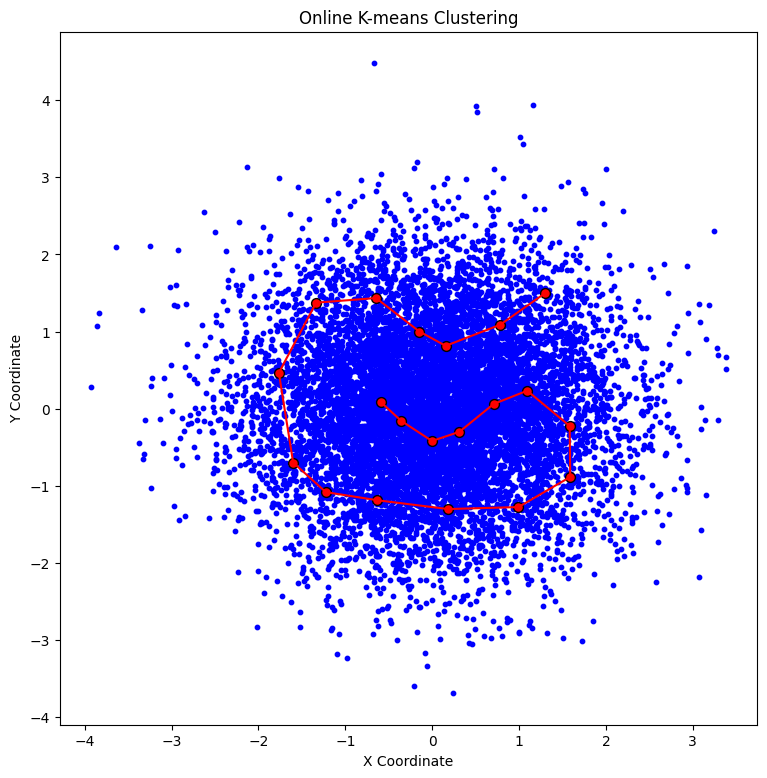

KeyboardInterrupt: 

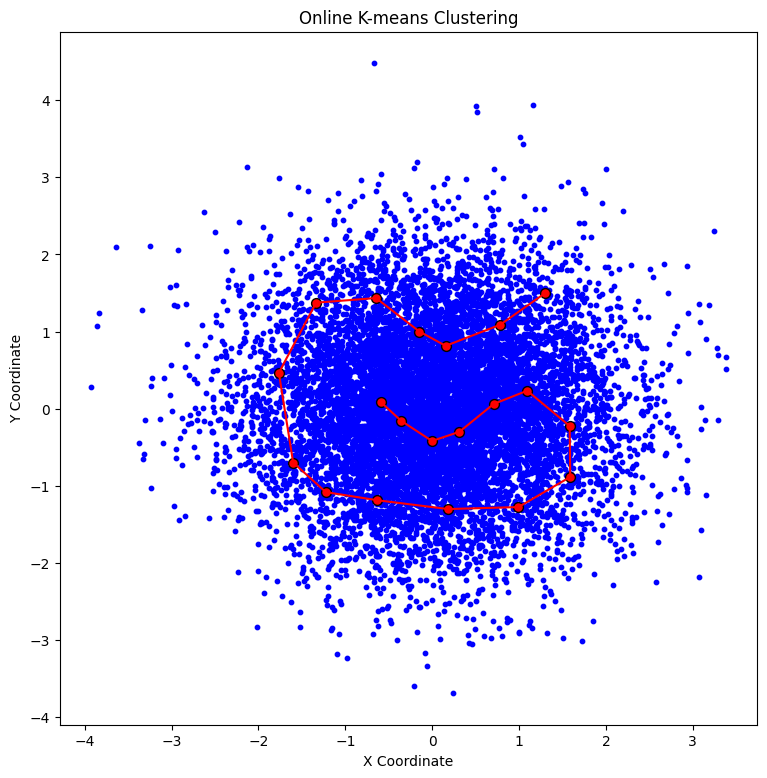

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def plot_clustering(X, centroids, ax):
    ax.clear()  # Clear previous plots
    # Assign each point in X to the nearest centroid and get the color mapping for the plot
    assignments = [closest_centroid(x, centroids) for x in X]
    colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

    # Plotting the clusters and centroids
    for idx, centroid in enumerate(centroids):
        # Plot points assigned to this centroid
        cluster_points = X[np.array(assignments) == idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color='blue', s=10)
        ax.scatter(centroid[0], centroid[1], color='red', s=50, edgecolors='black')

    # Draw a red line between each centroid and the next
    for i in range(len(centroids) - 1):
        ax.plot([centroids[i][0], centroids[i+1][0]], [centroids[i][1], centroids[i+1][1]], 'r-')

    ax.set_title('Online K-means Clustering')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid
    distances = np.linalg.norm(centroids - x, axis=1)
    return np.argmin(distances)

# Example usage:

# Dataset initialization
n = 10000
np.random.seed(42)  # For reproducibility
X = np.random.randn(n, 2)  # 1000 random points in 2D

# Clustering parameters
k = 20
alpha = 0.1
epochs = 1000

# Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X[random_indices]

# Run the online K-means algorithm
for epoch in range(epochs):
    for idx in range(1000):
        x = X[np.random.randint(n)]  # Sample a random point
        centroid_idx = closest_centroid(x, centroids)  # Find nearest centroid
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x  # Update the centroid
        if centroid_idx -1 >= 0:
            centroids[centroid_idx-1] = (1 - alpha/2) * centroids[centroid_idx-1] + (alpha/2) * x  # Update the centroid
        if centroid_idx +1 < k:
            centroids[centroid_idx+1] = (1 - alpha/2) * centroids[centroid_idx+1] + (alpha/2) * x  # Update the centroid

        if idx % 1000 == 0:  # Conditional plotting
            fig, ax = plt.subplots(figsize=(9, 9))
            plot_clustering(X, centroids, ax)
            display(fig)
            time.sleep(0.1)
            clear_output(wait=True)
            plt.close(fig)

In [ ]:
X.shape

# Siatka zamiast scieżki

KeyboardInterrupt: 

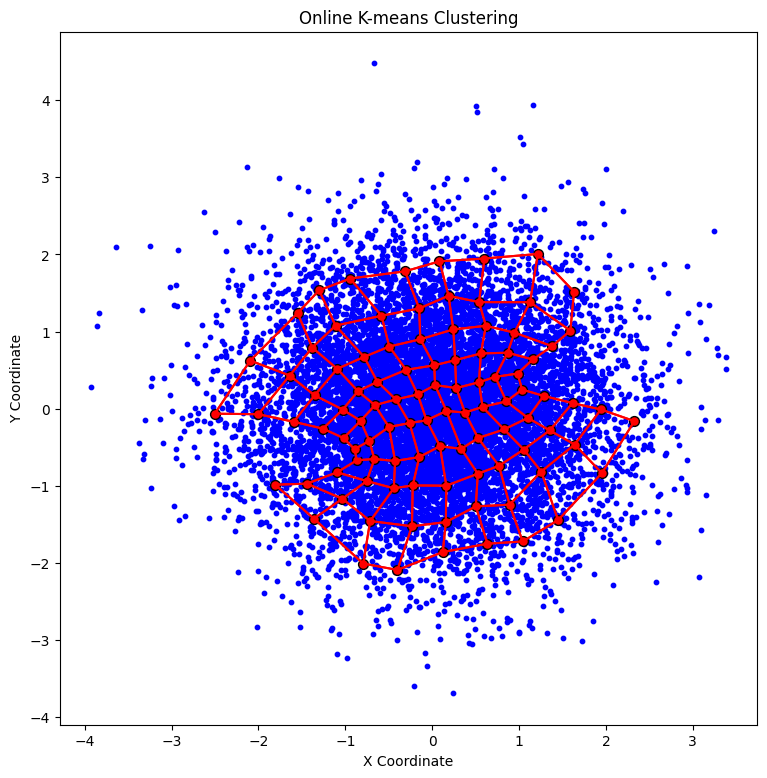

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def plot_clustering(X, centroids, G, ax):
    ax.clear()  # Clear previous plots
    # Assign each point in X to the nearest centroid and get the color mapping for the plot
    assignments = [closest_centroid(x, centroids) for x in X]
    colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

    # Plotting the clusters and centroids
    for idx, centroid in enumerate(centroids):
        # Plot points assigned to this centroid
        cluster_points = X[np.array(assignments) == idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color='blue', s=10)
        ax.scatter(centroid[0], centroid[1], color='red', s=50, edgecolors='black')

    # Draw a red line between each centroid and the next
    for i in range(len(centroids)):
        for j in G[i]:
            ax.plot([centroids[i][0], centroids[j][0]], [centroids[i][1], centroids[j][1]], 'r-')
        #ax.plot([centroids[i][0], centroids[i+1][0]], [centroids[i][1], centroids[i+1][1]], 'r-')

    ax.set_title('Online K-means Clustering')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

############################################################################################################



def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid
    distances = np.linalg.norm(centroids - x, axis=1)
    return np.argmin(distances)

# Example usage:

# Dataset initialization
n = 10000
np.random.seed(42)  # For reproducibility
X = np.random.randn(n, 2)  # 1000 random points in 2D

# Clustering parameters
v = 10
k = v*v
alpha = 0.1
epochs = 1000

# Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X[random_indices]

def position(centroid_idx):
    return centroid_idx // v, centroid_idx % v

G = dict()
for i in range(k):
    G[i] = []

for i in range(k):
    for j in range(k):
        if i != j:
            x1, y1 = position(i)
            x2, y2 = position(j)
            if abs(x1 - x2) + abs(y1 - y2) <= 1:
                G[i].append(j)
          

# Run the online K-means algorithm
for epoch in range(epochs):
    for idx in range(10000):
        x = X[np.random.randint(n)]  # Sample a random point
        centroid_idx = closest_centroid(x, centroids)  # Find nearest centroid
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x  # Update the centroid
        for n_idx in G[centroid_idx]:
            centroids[n_idx] = (1 - alpha/2) * centroids[n_idx] + (alpha/2) * x


        if idx % n == 0:  # Conditional plotting
            fig, ax = plt.subplots(figsize=(9, 9))
            plot_clustering(X, centroids, G, ax)
            display(fig)
            time.sleep(0.1)
            clear_output(wait=True)
            plt.close(fig)

# Mapa Kohonena na MNIST

In [24]:
from IPython import display

import numpy as np
from minisom import MiniSom
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Download MNIST dataset
X_mnist, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Normalize data
X_mnist = X_mnist / 255.0

X_mnist = X_mnist[y == '1']


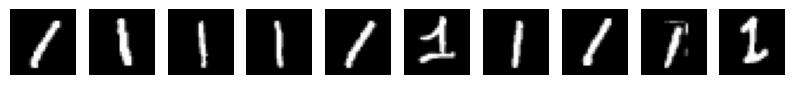

In [25]:
import matplotlib.pyplot as plt

# Select the first 10 images
images = X_mnist[:10]

# Plot each image
fig, axes = plt.subplots(1, 10, figsize=(10, 2))  # Set the subplot to have 1 row and 10 columns
for i, ax in enumerate(axes):
    # Reshape each image to 28x28 and display it
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')  # Hide axes
plt.show()


In [26]:
X_mnist.shape

(7877, 784)

In [27]:
def plot_som_centroids(som, som_size):
    # Plot the weights of the Kohonen map
    plt.figure(figsize=(10, 10))
    for i in range(som_size):
        for j in range(som_size):
            weight = som.get_weights()[i, j].reshape(28, 28)  # Reshape weights to 28x28 (MNIST images size)
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(weight, cmap='gray')
            plt.axis('off')
    plt.show()

In [28]:
# Initialize Kohonen map (SOM)
som_size = 16  # 10x10 grid
som = MiniSom(som_size, som_size, X_mnist.shape[1], sigma=1.0, learning_rate=0.5)

# Train SOM

In [31]:
print("Training Kohonen map...")

for epoch in range(4):
    print(f"Epoch {epoch+1}/10, Quantization error:, {som.quantization_error(X_mnist)}", end=" ")

    som.train_random(X_mnist, X_mnist.shape[0])  # Train with 60000 iterations
    print()

print("Training completed.")

Training Kohonen map...
Epoch 1/10, Quantization error:, 2.058152539487504 
Epoch 2/10, Quantization error:, 2.054657026422354 
Epoch 3/10, Quantization error:, 2.0608544832511178 
Epoch 4/10, Quantization error:, 2.0547099301564864 
Training completed.


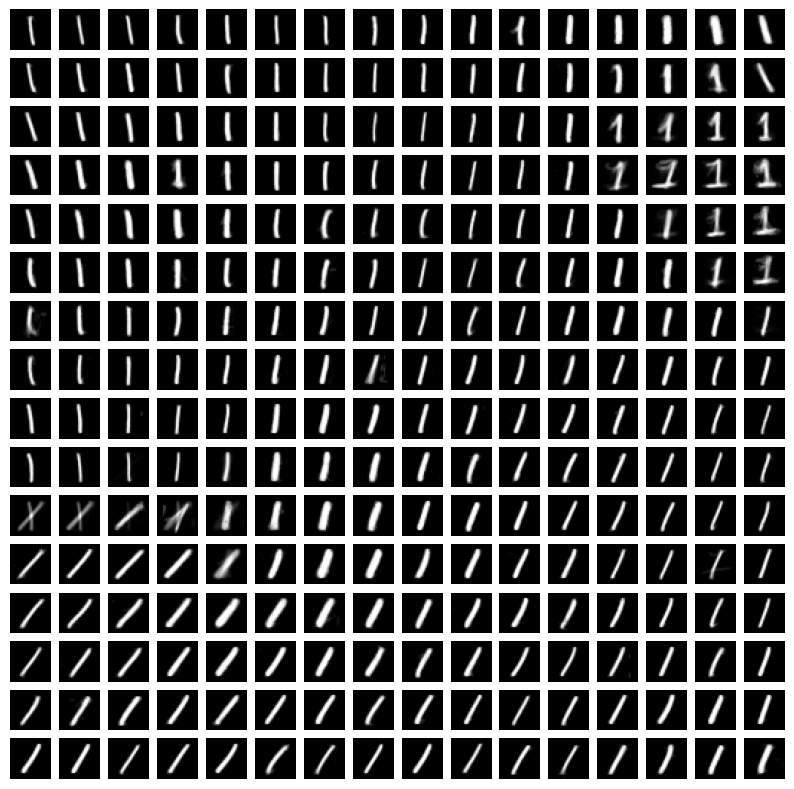

In [32]:
plot_som_centroids(som, som_size)


# Najprostszy model generatywny

In [33]:
from sklearn.neighbors import NearestNeighbors

def round_centroids(som, som_size, X_mnist):
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X_mnist)

    round_centroids = np.zeros((som_size, som_size, 28, 28))
    for i in range(som_size):
        for j in range(som_size):
            centroid = som.get_weights()[i, j].reshape(1, -1)
            _, idx = nn.kneighbors(centroid, 1)
            
            round_centroids[i,j] = X_mnist[idx,:].reshape(28,28)
    return round_centroids

rounded_centroids = round_centroids(som, som_size, X_mnist)

Poniżej: $X \in \mathbb{R}^2$, natomiast $Y\in \mathbb{R}^{784}$. $x_i$ to pozycja $i$-tego centroidu w topologii mapy Kohonena, natomiast $y_i$ to nie jest sama surowa pozycja tego centroidu w $\mathbb{R}^{784}$, tylko $y_i$ to jest najbliższy centroidowi prawdziwy obrazek. Dzięki temu model uczy się na obrazkach z ostrzejszym detalem.

In [34]:
X = np.zeros((som_size**2, 2))
Y = np.zeros((som_size**2, 784))

for i in range(som_size):
    for j in range(som_size):
        X[i*som_size+j,:] = np.array([i, j])
        Y[i*som_size+j,:] = rounded_centroids[i,j].reshape(1, -1)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(4, 8, 16, 32, 64, 128, 256, 512), max_iter=10000, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on training data
Y_train_pred = model.predict(X_train)

# Predict on testing data
Y_test_pred = model.predict(X_test)

# Evaluate the mean squared error on the training set
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f"Training MSE: {train_mse:.4f}")

# Evaluate the mean squared error on the testing set
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f"Testing MSE: {test_mse:.4f}")


Training MSE: 0.0134
Testing MSE: 0.0128


In [37]:
def plot_generation(model, rounded_centroids):
    som_size = rounded_centroids.shape[0]
    plt.figure(figsize=(10, 10))
    for i in range(som_size):
        for j in range(som_size):
            x = np.array([[i, j]]) + np.random.uniform(low=-0.5, high=0.5, size=(2))           
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(model.predict(x).reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

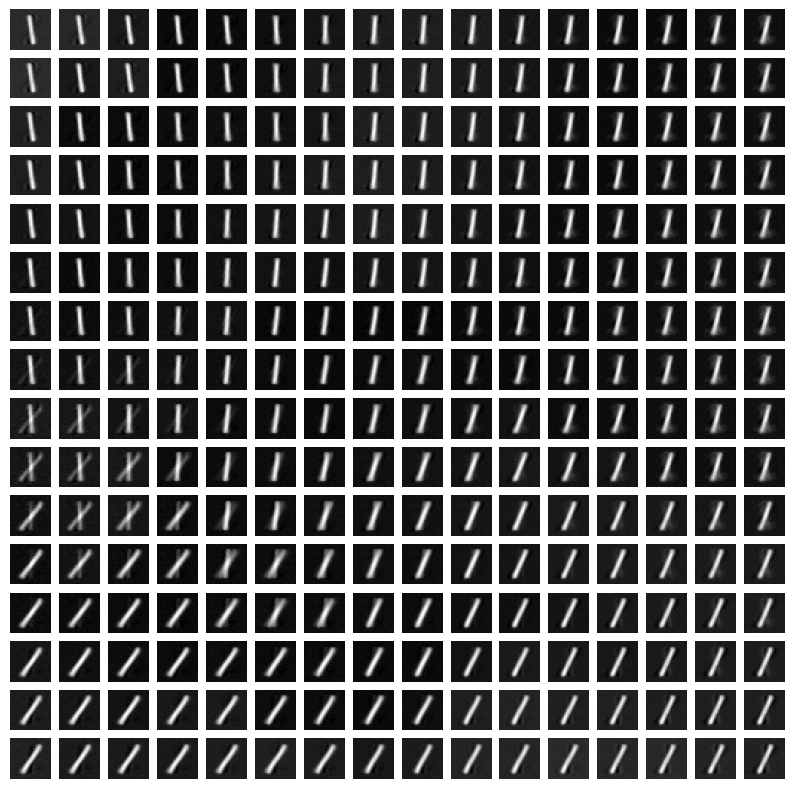

In [38]:
plot_generation(model, rounded_centroids)